In [7]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("make_corpus/jawiki.model")

In [35]:
import numpy as np
p = ["皇帝","女"]
n = []

results = model.wv.most_similar(p,n, topn=10)

for result in results:
    print(result[0], '\t', result[1])

姫君 	 0.6757448315620422
男 	 0.6743749380111694
寵姫 	 0.6644174456596375
侍女 	 0.6563159823417664
王女 	 0.6550811529159546
王妃 	 0.6519767045974731
帝 	 0.6469862461090088
王子 	 0.6462088823318481
女帝 	 0.6449722051620483
妾 	 0.6449054479598999


In [36]:
sp, sn = np.zeros((200,),dtype=float), np.zeros((200,),dtype=float)
for w in p:
    sp += model.wv[w]
for w in n:
    sn += model.wv[w]

cw = len(p)+len(n)
    
results = model.wv.similar_by_vector((sp-sn)/cw, topn=10+cw)

for result in results:
    if not result[0] in p and not result[0] in n:
        print(result[0], '\t', result[1])

姫君 	 0.6731151342391968
男 	 0.6662282943725586
寵姫 	 0.6661146879196167
侍女 	 0.654399037361145
王女 	 0.6543127298355103
王妃 	 0.6535855531692505
帝 	 0.6524242162704468
女帝 	 0.6497179865837097
君主 	 0.6494975090026855
王子 	 0.6455827355384827


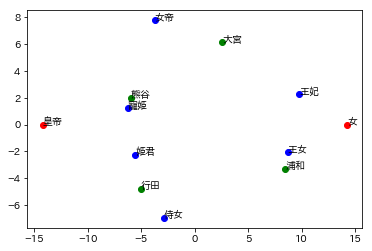

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

words1 = ["皇帝","女"]
words2 = ["姫君","寵姫","侍女","王女","王妃","女帝"]
words3 = ["大宮","浦和","熊谷","行田"]

vectors1 = [model.wv[v] for v in words1]
vectors2 = [model.wv[v] for v in words2]
vectors3 = [model.wv[v] for v in words3]

pca = PCA(n_components=2)
pca.fit(vectors1)
pca_1 = pca.transform(vectors1)
pca.fit(vectors2)
pca_2 = pca.transform(vectors2)
pca.fit(vectors3)
pca_3 = pca.transform(vectors3)

for d, w in zip(pca_1,words1):
    plt.plot(d[0],d[1],'o',c="red")
    plt.annotate(w, xy=d)
    
for d, w in zip(pca_2,words2):
    plt.plot(d[0],d[1],'o',c="blue")
    plt.annotate(w, xy=d)
    
for d, w in zip(pca_3,words3):
    plt.plot(d[0],d[1],'o',c="green")
    plt.annotate(w, xy=d)
    
plt.show()

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

vectors = []
words = []
c = len(model.wv.Vocab())

for v in model.wv[model.wv.keys()[np.randam.rand()*c]]:
    vectors.append(v)
    words.append(model.wv.keys()[np.randam.rand()*c])
vectors = np.asarray(vectors)

pca = PCA(n_components=2)
pca.fit(vectors)
pca_1 = pca.transform(vectors)


for d, w in zip(pca_1,words):
    plt.plot(d[0],d[1],'o',c="red")
    plt.annotate(w, xy=d)
    
plt.show()

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'Vocab'